# Solving 10 Queens using pygenetic

In this example we are going to walk through the usage of GAEngine to solve the N-Queens problem 
The objective would be to place queens on single board such that all are in safe position
<b>Each configuration of board represents a potential candidate solution for the problem</b>


## 1. Chromosome Representation

<img src="nQueens-Chromosome.png" style="width:700px;">

For the given chess board, the chromosome is encoded as the row number in which each the queen is present in each column of the chess board. It can also be encoded as the column number in which each the queen is present in each row of the chess board (as done in this code)

This can be easily achieved by using the `RangeFactory` of `pygenetic`. <br/>
The `RangeFactory` takes the following parameters
* minValue = minimum value a gene can take = 0 <br/>
* maxValue = minimum value a gene can take = 9 <br/>
* duplicates = if duplicates are allowed = False <br/>
* noOfGenes = number of genes in the chromosome = 10

In [1]:
from pygenetic import ChromosomeFactory

factory = ChromosomeFactory.ChromosomeRangeFactory(minValue=0,maxValue=9,noOfGenes=10,duplicates=False)

You can also check if the factory works as expected by calling `createChromosome` function and observing the chromosome produced by the factory

In [2]:
# Code to test if factory works as expected
for i in range(5):
    print('Chromosome created: ', factory.createChromosome())

Chromosome created:  [3, 7, 0, 1, 8, 4, 9, 2, 5, 6]
Chromosome created:  [1, 0, 9, 5, 8, 4, 2, 6, 3, 7]
Chromosome created:  [1, 3, 2, 6, 9, 8, 5, 4, 0, 7]
Chromosome created:  [4, 8, 1, 6, 5, 9, 7, 2, 0, 3]
Chromosome created:  [1, 8, 2, 4, 6, 9, 0, 5, 3, 7]


## 2. Fitness function 
Fitness for a given chromosome is the number of non-intersecting queens for that given chess board configuration. Hence the highest fitness for a N X N chess board is N. Hence, we have a maximization GA problem with the aim of achieving fitness value N.

We can easily define such fitness functions in python taking a chromosome as a parameter

In [3]:
def fitness(board):
    fitness = 0
    for i in range(len(board)):
        isSafe = True
        for j in range(len(board)):
            if i!=j:
                # Shouldn't be present on same row/diagonal
                if board[i] == board[j] or abs(board[i] - board[j])==abs(i-j):
                    isSafe = False
                    break
        if(isSafe==True):
            fitness += 1
    return fitness

We need then create a `GAEngine` instance from the `pygenetic` package and set the following
* `factory` = the range factory instance we had intially created
* `population_size = 500` would be a good number for this problem
* `cross_prob = 0.8`
* `mut_prob = 0.2`
* `fitness_type = ('equal', 10)` since our objective in this GA is to achieve the fitness value of 10

In [4]:
from pygenetic import GAEngine
ga = GAEngine.GAEngine(factory,population_size=500,fitness_type=('equal',10),mut_prob = 0.2,cross_prob = 0.8)

We can now add the fitness function we had defined to this `GAEngine` instance

In [5]:
ga.setFitnessHandler(fitness)

## 3. Determing other attributes of the GA

Many Standard Crossover, Mutation, Selection and Fitness functions are present in the `Utils` module of the `pygenetic` package.

In [6]:
from pygenetic import Utils

### Crossover
Traditional crossover methods such as 1-point, 2-point crossover cannot be used since it create duplicate genes in the offsprings. In the popularly used `distinct` crossover, the first half of the chromosome is kept the same while the second half is obtained by sequentially traversing the second chromosome and adding elements only if that element is not already present.
<img src="nQueens-crossover.png" style="width:700px;">

This can be done using the `addCrossoverHandler` of the pygenetic module which takes as parameters
* crossover_function = the crossover function to be used
* weight = the weightage the crossover function needs to be given (mainly used when multiple crossovers are added)

In [7]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)

### Mutation

The use of the mutation technique of `swap` as shown in the diagram also ensures that each element in the chromosome is a unique number and that there are no duplicates. This is a suitable for mutation function for this problem
<img src="nQueens-mutation.png" style="width:700px">

This can be done using the `addMutationHandler` of the pygenetic module which takes as parameters
* mutation_function = the mutation function to be used
* weight = the weightage the mutation function needs to be given (mainly used when multiple mutations are added)

In [8]:
ga.addMutationHandler(Utils.MutationHandlers.swap,2)

## Selection
The selection function `best` chooses the best (1 - cross_prob) percent of the population. Hence, this function is one of the possible selection handlers which can be used in our genetic algorithm

In [9]:
ga.setSelectionHandler(Utils.SelectionHandlers.best)

## 4. Time to Evolve

This can be easily done using the `evolve` function of the GAEngine instance. It takes the `noOfIterations` as a parameter. Let's evolve it for 100 generations

In [10]:
ga.evolve(100)

mutation_handlers_weights =  [1.0]
crossover_handlers_weights =  [1.0]
Diversity =  0.07021538292995347
New mutation value =  0.39651977650666065
Members left after selection =  500
Best member after selection =  [8, 5, 2, 0, 7, 6, 4, 9, 1, 3]
Best fitness after selection =  8
crossover_indices =  [333   7 301 253 254 189  48  29 246 248 296  40 159 107  51 128 229  79
  52 271  99 119 216 334 287 242  47  58 233  82 185 275 377 465 150  89
 370  36 302 340  30 137 326  27 356  45  68 378 255 339 180 130 143 183
 363   2  78   0 104 221 274 309 315  14 171  24 211  90 439 371 464 155
 201 311  50  18 428  19  53 250 335  65  21 321  16  38  55 381  43 190
  77 383 276 280 116 249 125 160  74 265 195  54 109   4  11 103 264 194
 261  28  73  37 458 247 184 174 151 351  39 168 102  49  67 133  12  97
 164 209 400 105 215 245  96 320 237  23  88  13 369  64 177   6  91  69
  98  20 260 312 192 463 438  86  25 131 181 282  83 393 308 331 140 241
   5 219 286 420  10 111 442   3 231 396  63

crossover_indices =  [248 144 119 358  20 143 458   1 389   5  68 178 161 430  82 262  23 378
 349 297  62 400  44  27 162 184   6 258 129  95 343 336  47 174  43 251
 355 191  37  18 120  88  11 410 104  28  50   0  19 333  96 199 220 211
 142 422   3  38 323  73  24  16 205  94 384 392 307 298 148  98  46 206
 172  75 296  70  32  17  33 342 210 101 110   7 235 116  53 396 416 309
  22 100 140 154  61 149   4 295 459 388 234  54  55 390 123 361 195 441
  30 402 462 157 331 449 114 138  57 188 202  15  74 176 267  58 198 364
  92 214  25 302 127  91 232  34 328 254  83 169 327  93 163  78 226   9
 152  84 457 108 155  35 137 115 118 465  69  79  13 478 189 419 303  45
 225 265 360 247 219 338 444  85  31 213  81 122 197  80  76 284 368 192
 352 420 271 167 320 196  42 186  36 321 424 362 159 183  48  65  77 200
 365 132 356 445 346 264  67  97 434 151 253 236 203 233 156  14 314 252
 130 474 166 373 190 305 412 479 249  99 403 185  39 325 399 250 179 241
 194 354 136 423 341 231 164 3

We can get the best member by using the `best_fitness` attribute of the `GAEngine`. 
It returns a tuple having
* chromsome having best fitness
* best fitness value

In [11]:
best = ga.best_fitness
print(best)

([2, 5, 8, 0, 9, 4, 6, 1, 3, 7], 10)


We can decode the chromosome into a chess board accordingly

In [12]:
def print_board(chromosome):
    for i in chromosome:
        for x in range(i):
            print("-",end=' ') 
        print('Q', end=' ')
        for x in range(len(chromosome)-i-1):
            print("-",end=' ') 
        print()
            
print('Best Board is')
print_board(ga.best_fitness[0])

Best Board is
- - Q - - - - - - - 
- - - - - Q - - - - 
- - - - - - - - Q - 
Q - - - - - - - - - 
- - - - - - - - - Q 
- - - - Q - - - - - 
- - - - - - Q - - - 
- Q - - - - - - - - 
- - - Q - - - - - - 
- - - - - - - Q - - 


## 5. Plotting the Statistics

- The functionality for plotting the best, worst, average fitness values across iterations is present in `plot_statistics` function of statistics.py module. The function takes a list of attributes to be plotted.
- These attributes can be `best-fitness`,`worst-fitness`,`avg-fitness`, `'diversity`, `mutation_rate`
- The diversity and mutation rate values over iterations can also be visualized 

best-fitness [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10]
worst-fitness [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
avg-fitness [2.73, 3.092, 3.166, 3.372, 3.464, 3.516, 3.612, 3.696, 3.62, 3.65, 3.696, 3.712, 3.852]


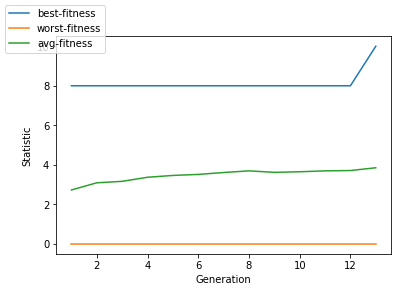

diversity [0.07021538292995347, 0.07562454627963053, 0.08082628285403222, 0.08086551799129198, 0.0833870973232667, 0.0787622244480182, 0.08315594987732387, 0.08118600864681041, 0.08044376918071403, 0.08064118054691424, 0.08503627461266154, 0.08547579774415663, 0.08797836097586717]


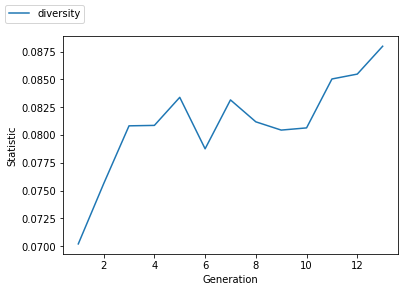

mutation_rate [0.39651977650666065, 0.3962541821578632, 0.39599910801074745, 0.39599718531084316, 0.39587365561889876, 0.3961002825799394, 0.3958849760963187, 0.395981480512393, 0.3960178538962164, 0.3960081791162292, 0.3957929057224058, 0.3957713905831984, 0.3965115563167264]


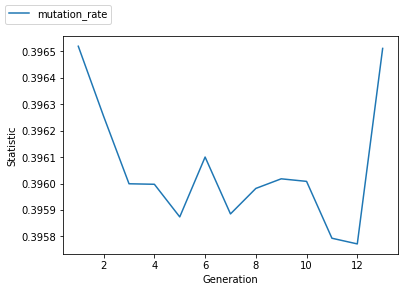

In [13]:
import matplotlib.pyplot as plt
fig = ga.statistics.plot_statistics(['best-fitness','worst-fitness','avg-fitness'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()